In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import butter, lfilter
from scipy import signal
import pandas as pd
from sklearn.cross_decomposition import CCA
from os import listdir
from os.path import isfile, join

In [3]:
DB_path = "../DB/"
DBfiles = [f for f in listdir(DB_path) if isfile(join(DB_path, f))]
DBfiles = DBfiles[2:]


['S1.mat',
 'S2.mat',
 'S3.mat',
 'S4.mat',
 'S5.mat',
 'S6.mat',
 'S7.mat',
 'S8.mat',
 'S9.mat']

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def notch_filter(data):
    samp_freq = sr  
    notch_freq = 50.0 
    quality_factor = 20.0  
    
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    outputSignal = signal.filtfilt(b_notch, a_notch, data)
    return outputSignal

def avg_signal(signal):
    avg_signal = np.zeros(1500)                             
    iter = signal.shape[1]
    for col in np.arange(iter):
        avg_signal += signal[:,col]
    return avg_signal/iter

def drop_trash_data(data, avoid_data):
    return data[avoid_data:data.size-avoid_data:]  

def get_data(data, electrode, freq):
    elec = int(electrodes[electrode])-1
    frec = stimulation[freq]
    return data[elec,:,frec,:]

def plot_time_signals(raw_data, filtered_data):
    fig, ax = plt.subplots(2,figsize=(35,10))
    ax[0].plot(time_steps,raw_data)
    ax[0].set_title("Raw Signal")
    ax[1].plot(time_steps,filtered_data)
    ax[1].set_title("Filtered Signal")
    plt.show()

def plot_fft_signals(raw_data, filtered_data, notch_filtered_data):
    x = fft(raw_data)
    x1 = fft(filtered_data)
    x2 = fft(notch_filtered_data)
    N = len(x)
    n = np.arange(N)
    sample_rate = sr
    T = N/sample_rate
    freq = n/T 
    n_oneside = N//2
    f_oneside = freq[:n_oneside]
    fig, ax = plt.subplots(3,figsize=(30,15))
    ax[0].plot(f_oneside, np.abs(x[:n_oneside]))
    ax[0].set_title("Raw Signal")
    ax[0].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 1.0))
    ax[0].grid()
    ax[1].plot(f_oneside, np.abs(x1[:n_oneside]))
    ax[1].set_title("Filtered Signal")
    ax[1].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 1.0))
    ax[1].grid()
    ax[2].plot(f_oneside, np.abs(x2[:n_oneside]))
    ax[2].set_title("Notch Filtered Signal")
    ax[2].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 1.0))
    ax[2].grid()
    plt.show()

### ELECTRODOS INDEX

In [3]:
#DICCIONARIO DE INDICES DE ELECTRODOS

def remove_whitespace(s):
    return s.strip()

df = pd.read_csv('../DB/electrodo_index.csv', header=None,sep='\t')
df[3] = df[3].astype(str)
df[3] = df[3].apply(remove_whitespace)
df[3] = df[3].replace('nan','PO5')
df[0] = df[0].replace('54      -144', '54')

electrode_name = np.array(df[3])
electrode_index = np.array(df[0])
electrodes = dict(zip(electrode_name,electrode_index))
electrodes

{'FP1': '1',
 'FPZ': '2',
 'FP2': '3',
 'AF3': '4',
 'AF4': '5',
 'F7': '6',
 'F5': '7',
 'F3': '8',
 'F1': '9',
 'FZ': '10',
 'F2': '11',
 'F4': '12',
 'F6': '13',
 'F8': '14',
 'FT7': '15',
 'FC5': '16',
 'FC3': '17',
 'FC1': '18',
 'FCz': '19',
 'FC2': '20',
 'FC4': '21',
 'FC6': '22',
 'FT8': '23',
 'T7': '24',
 'C5': '25',
 'C3': '26',
 'C1': '27',
 'Cz': '28',
 'C2': '29',
 'C4': '30',
 'C6': '31',
 'T8': '32',
 'M1': '33',
 'TP7': '34',
 'CP5': '35',
 'CP3': '36',
 'CP1': '37',
 'CPZ': '38',
 'CP2': '39',
 'CP4': '40',
 'CP6': '41',
 'TP8': '42',
 'M2': '43',
 'P7': '44',
 'P5': '45',
 'P3': '46',
 'P1': '47',
 'PZ': '48',
 'P2': '49',
 'P4': '50',
 'P6': '51',
 'P8': '52',
 'PO7': '53',
 'PO5': '54',
 'PO3': '55',
 'POz': '56',
 'PO4': '57',
 'PO6': '58',
 'PO8': '59',
 'CB1': '60',
 'O1': '61',
 'Oz': '62',
 'O2': '63',
 'CB2': '64'}

### FRECUENCIAS DE ESTIMULOS

In [4]:
#DICCIONARIO DE LAS FRECUENCIAS DE ESTIMULACIONES

freqs = scipy.io.loadmat('../DB/Freq_Phase.mat')
freqs = freqs['freqs'][0,:].astype(str)
stimulation = dict(zip(freqs,np.arange(len(freqs))))
stimulation


{'8.0': 0,
 '9.0': 1,
 '10.0': 2,
 '11.0': 3,
 '12.0': 4,
 '13.0': 5,
 '14.0': 6,
 '15.0': 7,
 '8.2': 8,
 '9.2': 9,
 '10.2': 10,
 '11.2': 11,
 '12.200000000000001': 12,
 '13.200000000000001': 13,
 '14.200000000000001': 14,
 '15.200000000000001': 15,
 '8.4': 16,
 '9.4': 17,
 '10.4': 18,
 '11.4': 19,
 '12.4': 20,
 '13.4': 21,
 '14.4': 22,
 '15.4': 23,
 '8.6': 24,
 '9.6': 25,
 '10.6': 26,
 '11.6': 27,
 '12.600000000000001': 28,
 '13.600000000000001': 29,
 '14.600000000000001': 30,
 '15.600000000000001': 31,
 '8.8': 32,
 '9.8': 33,
 '10.8': 34,
 '11.8': 35,
 '12.8': 36,
 '13.8': 37,
 '14.8': 38,
 '15.8': 39}

### DATA(ELECTRODO, DATOS, FRECUENCIA, BLOQUE)

In [5]:
#PERSONA 1
mat = scipy.io.loadmat('../DB/S1.mat')
S1 = np.array(mat['data'])

#PERSONA 2
mat2 = scipy.io.loadmat('../DB/S2.mat')
S2 = np.array(mat2['data'])

sr = 250
avoid_time = 0.5
trash_data = int(avoid_time*sr)

In [106]:
S1_OZ = get_data(S2,'Oz','10.0')

### PROMEDIO DE SEÑAL Y ELIMINACION DE RUIDO

In [107]:
S1_OZ_15Hz_AVG = avg_signal(S1_OZ)

S1_OZ_15Hz_AVG_5sec = drop_trash_data(S1_OZ_15Hz_AVG,trash_data)

### FILTRADO DE SEÑAL

In [112]:
#PROCESO DE FILTRADO

filtered = butter_bandpass_filter(data=S1_OZ_15Hz_AVG_5sec,lowcut=7,highcut=30,fs=sr, order=9)

filtered_with_notch = notch_filter(filtered)


### PLOT DE SEÑAL EN TIEMPO

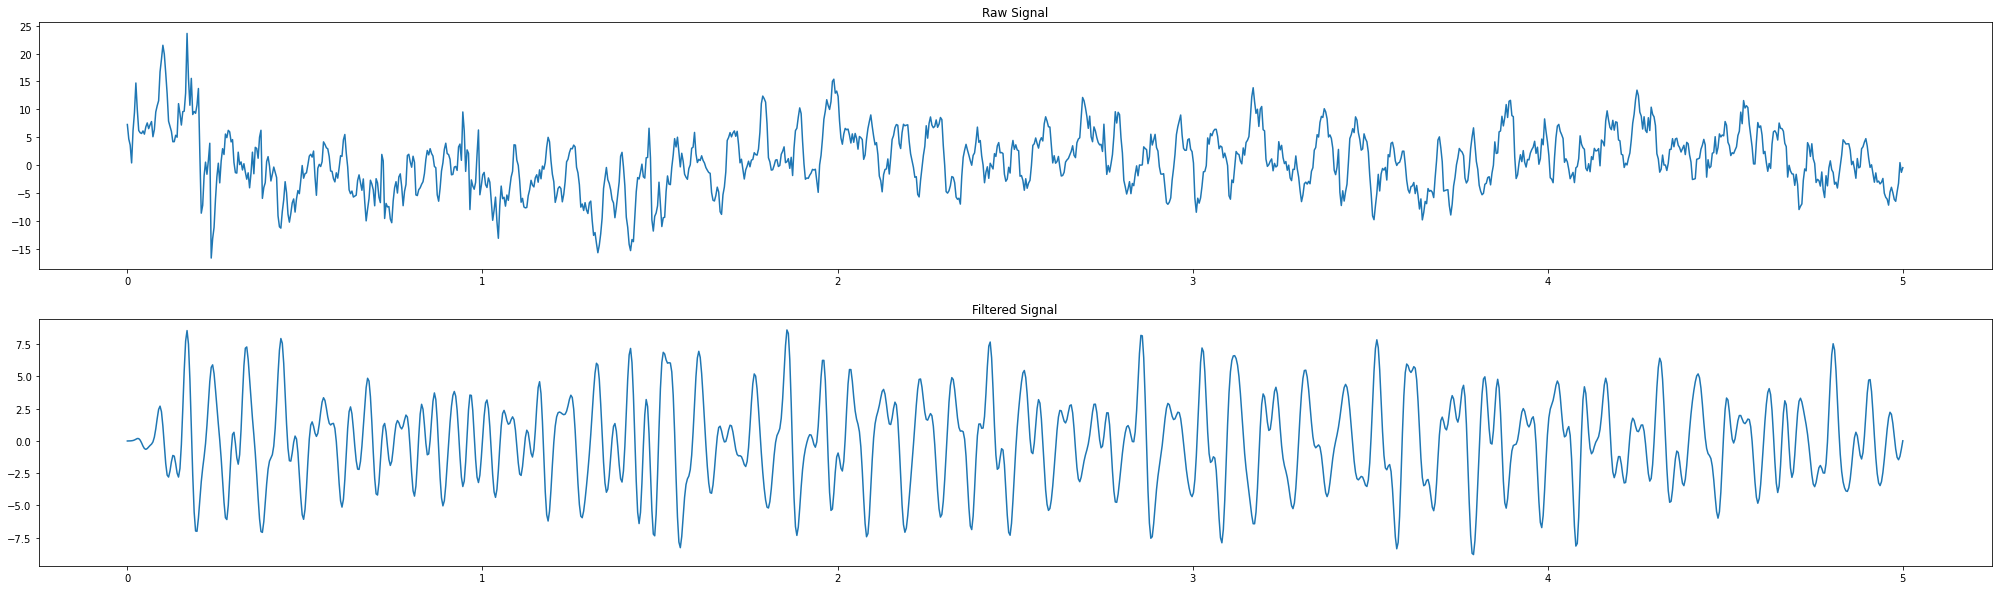

In [113]:
max_time = len(S1_OZ_15Hz_AVG_5sec)/sr
time_steps = np.linspace(0, max_time, len(S1_OZ_15Hz_AVG_5sec))

plot_time_signals(S1_OZ_15Hz_AVG_5sec, filtered_with_notch)

### PLOT DE SEÑAL EN FRECUENCIA

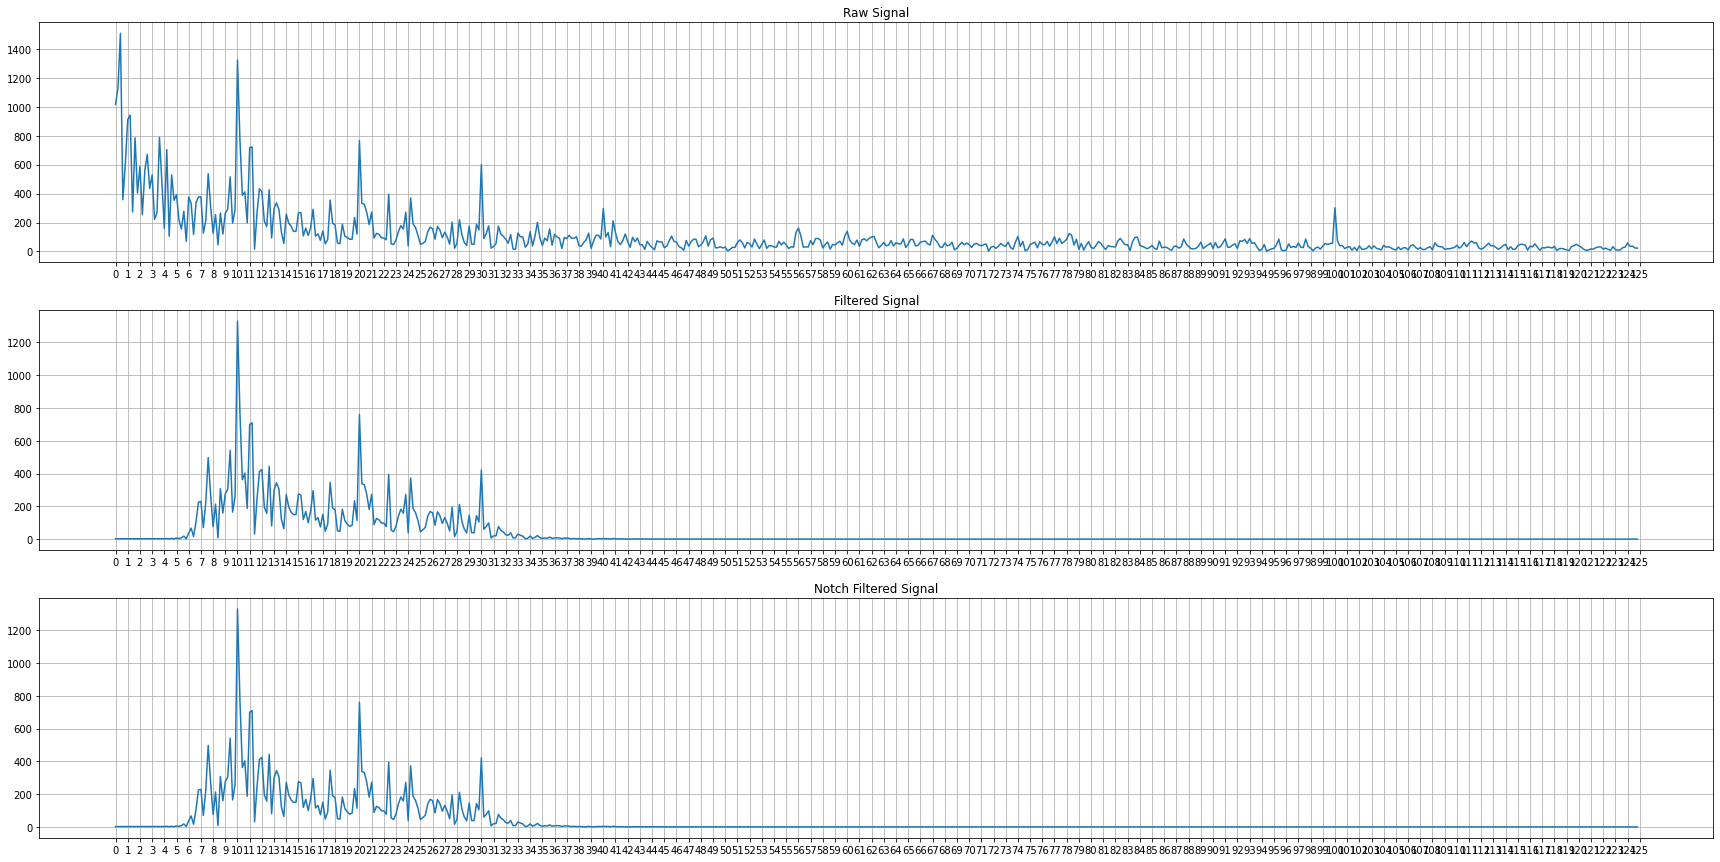

In [114]:
plot_fft_signals(S1_OZ_15Hz_AVG_5sec,filtered, filtered_with_notch)

### SEÑALES MODELO

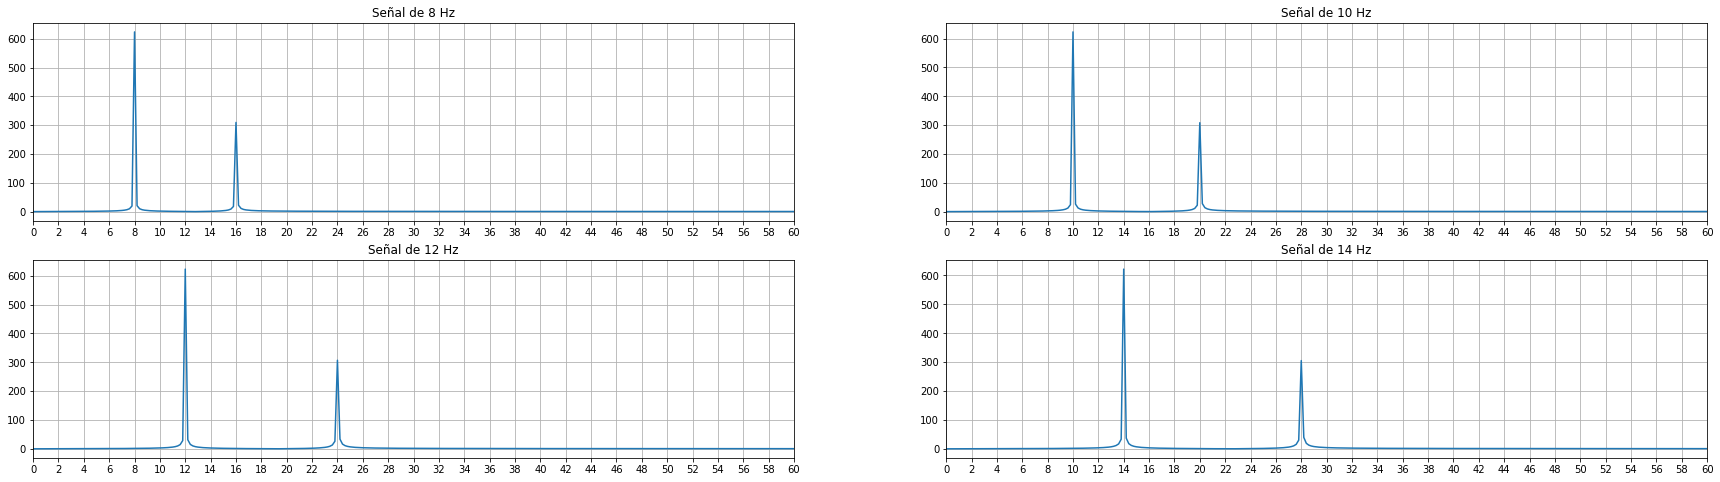

In [59]:
a1 = 1.0
a2 = 0.5

#FRECUENCIA DE LAS SEÑALES
target_freqs = [8,10,12,14]

reference_signals = []
reference_ffts = []

for index in np.arange(len(target_freqs)):
    model_signal = a1*np.sin(np.pi*2*time_steps*target_freqs[index]) + a2*np.sin(np.pi*4*time_steps*target_freqs[index])
    reference_signals.append(model_signal)
    reference_ffts.append(fft(model_signal))

N = len(reference_ffts[0])
n = np.arange(N)
T = N/sr
freq = n/T 
n_oneside = N//2
f_oneside = freq[:n_oneside]

fig, ax = plt.subplots(2,2,figsize=(30,8))

for i in np.arange(len(target_freqs)):
    if i<2:
        ax[0,i].plot(f_oneside, np.abs(reference_ffts[i][:n_oneside]))
        ax[0,i].set_title(f'Señal de {str(target_freqs[i])} Hz')
        ax[0,i].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 2.0))
        ax[0,i].set_xlim([0,60])
        ax[0,i].grid()
    else:
        ax[1,i-2].plot(f_oneside, np.abs(reference_ffts[i][:n_oneside]))
        ax[1,i-2].set_title(f'Señal de {str(target_freqs[i])} Hz')
        ax[1,i-2].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 2.0))
        ax[1,i-2].set_xlim([0,60])
        ax[1,i-2].grid()

plt.show()

### ALGORITMO CCA

In [115]:
def get_corr(EEG_signal, model_signals):
    EEG_signal_temp = EEG_signal.reshape(-1,1)
    cca = CCA(n_components=1)
    results = dict(zip(target_freqs,np.zeros(len(model_signals))))

    for index in np.arange(len(model_signals)):
        model_signal_temp = model_signals[index].reshape(-1,1)
        cca.fit(EEG_signal_temp, model_signal_temp)
        O1_a,O1_b = cca.transform(EEG_signal_temp, model_signal_temp)
        results[target_freqs[index]] = np.corrcoef(O1_a[:,0],O1_b)[0,1]
    
    return results


In [116]:
res = get_corr(filtered, reference_signals)
res

{8: 0.001911351756601041,
 10: 0.4928518684576902,
 12: 0.09533432442220892,
 14: 0.02579422340783081}